# What is the True Normal Human Body Temperature? 

## Andy Pickering

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# (1) Is the distribution of body temperatures normal?

First I plot the histogram and estimated probability density function using seaborn. I also plot a normal distribution pdf using the mean and std of the observations. The distribution appears to be close to normal.

/Users/Andy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


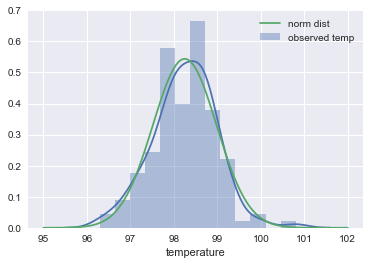

In [21]:
sns.distplot(df.temperature,label='observed temp');
x=np.linspace(95,102,100)
pdf=stats.norm.pdf(x,loc=df.temperature.mean(),scale=df.temperature.std())
plt.plot(x,pdf,label='norm dist')
plt.legend();
# plot a normal distribution w/ mean and std from data?

We can also apply a test for normality from scipy stats. The resulting p-value is 0.25, so it is likely that the distribution is normal (in other words, we fail to reject the null hypotheses that the disribution is normal).

In [22]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

# (2) Is the sample size large? Are the observations independent?

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


- There are 130 observations, which can be considered 'large', in the sense that we should be able to assume the sampling distribution will be normal. 
- I assume the observations are independent; I looked at the documentation for the data and did not find anything to suggest that they are not.

# (3) Is the true population mean really 98.6 degrees F?
- _Would you use a one-sample or two-sample test? Why?_
I would use a one sample test because we are not comparing different populations here.
- _In this situation, is it appropriate to use the tt or zz statistic?_
 It is probably appropriate to use the Z statistic here, because the sample size is large (N=130). However, it is a good idea to be conservative and always use the t-score, since it converges to normal for large sample sizes and degrees of freedom.


Our the null hypothesis that the mean = 98.6 . Alternative hypothesis is that the mean != 98.6 . I will use a significance level of 5%. Assuming the true mean is 98.6, what is the probability that we would get the observed mean 98.24 in a sample of 130 observations from the population?


In [5]:
# compute z-score (how many std away from 98.6 is our sample mean)
import math
mu=df.temperature.mean()
s=df.temperature.std()
N=len(df.temperature)
Z = (mu-98.6) / (s / math.sqrt(N) )
Z

-5.454823292364079

In [7]:
t_thresh = stats.t.ppf(q=0.975,df=N-1)
t_thresh

1.9785244914586051

We could also use the t-test function:

In [8]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Our Z-score is 5.45. The 97.5% threshold using the t-distribution is 1.98, meaning there is a 5% chance of getting a value less than 1.98 standard deviations below the mean or 1.98 standard deviations above the mean. The Z-score is much larger than this, meaning the probability of obtaining that value due to random chance is very small. Therefore we reject the the null hypothesis and conclude that the true population mean is not 98.6.

- _Now try using the other test. How is the result be different? Why?_
- The 97.5% threshold for the normal distribution is very close to that from the t-distribution, and we reach the same conclusion. This is expected, since the sample size is large and the t distribution becomes more normal at high N.

In [15]:
z_thresh = stats.norm.ppf(q=0.975)
z_thresh

1.959963984540054

# (4) At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

 I will assume that anything outside the 95% conf. limits for our sample to be 'abnormal''

In [55]:
stats.norm.interval(alpha=0.95,loc=mu,scale=s/math.sqrt(N))

(98.123196428181657, 98.375265110279898)

This confidence interval is for the estimate of the population mean from the sample. However, we can expect a single sample to take on a wider range of values, which are better captured by a [prediction interval](https://en.wikipedia.org/wiki/Prediction_interval#Unknown_mean.2C_unknown_variance>) . This is pointed out and nicely explained by Scott Piraino [here](https://github.com/ScottWPiraino/Springboard_Data_Science/blob/master/EDA/body_temp/ci_vs_pi.ipynb). The prediction interval is given below, and a value outside of this range could be considered abnormal.

In [20]:
d = s * t_thresh * np.sqrt((1 + 1/(N)))
pred_int = [mu-d , mu+d ]
pred_int

[96.793041311796571, 99.705420226664984]

# (5) Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
- Write a story with your conclusion in the context of the original problem

I would use a 2-sample t-test, not paired, not assuming equal variance, with a signifiance level of 95%

In [21]:
men = df.temperature.loc[df.gender=='M']
women = df.temperature.loc[df.gender=='F']

stats.ttest_ind(men, women, equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

The pvalue is 0.024, so I reject the null hypothesis that the means are equal, and conclude there is a significant difference in the average temperature between males and females.